The first thing we will do is visualize some of our data, and make sure that the classes are equally balanced. If they are, then it is probably appropriate to simply use accuracy as our metric.

Here's the link to the dataset: https://www.cs.toronto.edu/~kriz/cifar.html

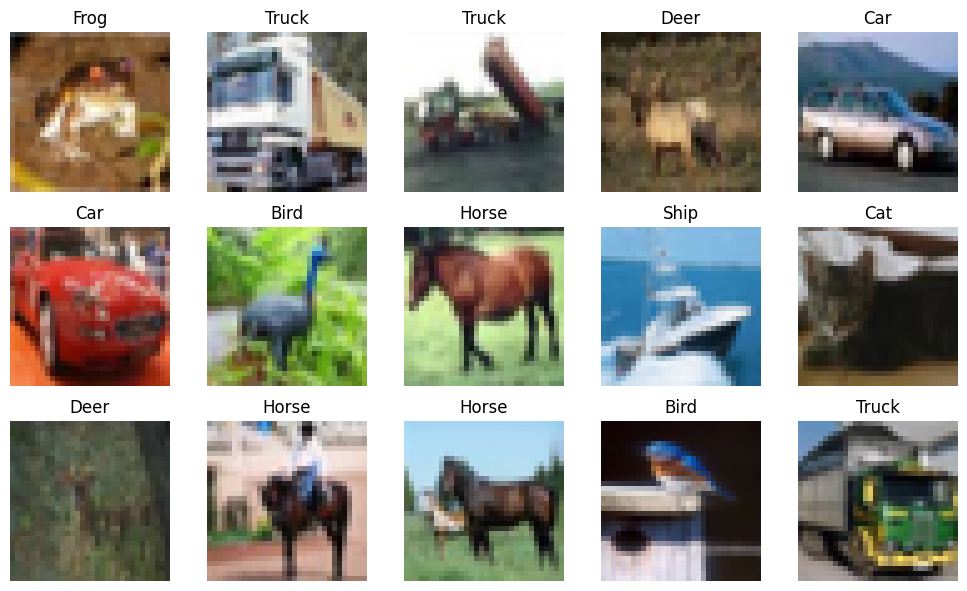

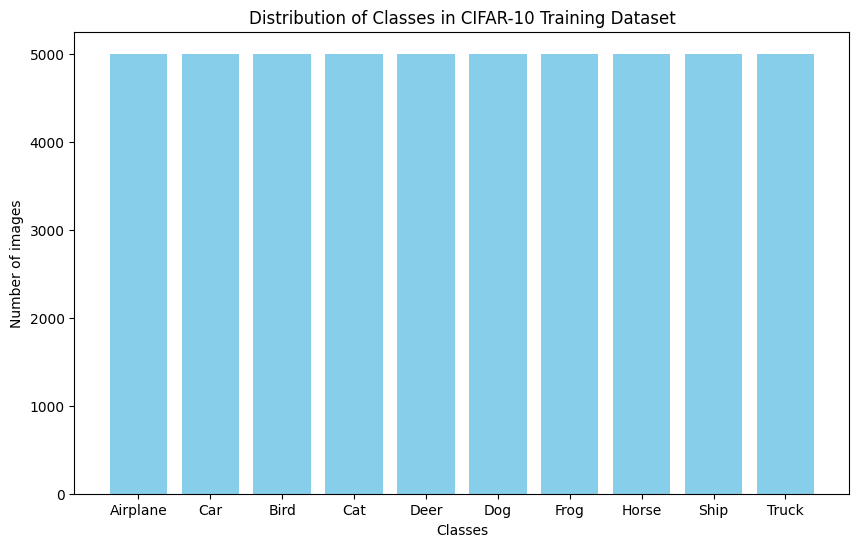

In [5]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#class names for CIFAR-10 dataset
class_names = ['Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

#visualizing some images from the dataset
fig, axes = plt.subplots(3, 5, figsize=(10, 6))
axes = axes.flatten()
for img, label, ax in zip(x_train[:15], y_train[:15], axes):
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(class_names[label[0]])
plt.tight_layout()
plt.show()

#distribution of classes in the training dataset
class_distribution = np.unique(y_train, return_counts=True)
class_labels = class_distribution[0]
class_counts = class_distribution[1]
plt.figure(figsize=(10, 6))
plt.bar(class_names, class_counts, color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Number of images')
plt.title('Distribution of Classes in CIFAR-10 Training Dataset')
plt.show()


Our data looks good, so lets go ahead and train it. I chose a traditional CNN architechture that includes 3 convolutional layers, and 2 dense layers, along with two dense layers at the end. This allows it to extract common shapes and patterns in a way that I think would be effective for this task.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')


170498071/170498071 [==============================] - 2s 0us/step
Epoch 1/10
1563/1563 [==============================] - 72s 45ms/step - loss: 1.5358 - accuracy: 0.4371 - val_loss: 1.3381 - val_accuracy: 0.5069
Epoch 2/10
1563/1563 [==============================] - 65s 42ms/step - loss: 1.1820 - accuracy: 0.5790 - val_loss: 1.1039 - val_accuracy: 0.6123
Epoch 3/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.0272 - accuracy: 0.6395 - val_loss: 0.9707 - val_accuracy: 0.6550
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9233 - accuracy: 0.6761 - val_loss: 0.9481 - val_accuracy: 0.6683
Epoch 5/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8547 - accuracy: 0.7016 - val_loss: 0.9105 - val_accuracy: 0.6890
Epoch 6/10
1563/1563 [==============================] - 63s 41ms/step - loss: 0.7907 - accuracy: 0.7229 - val_loss: 0.9524 - val_accuracy: 0.6722
Epoch 7/10
1563/1563 [==============================] - 6

Our final test accuracy on the dataset is 70%, which is pretty good considering that randomly guessing would be 10%!

In [2]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

#load the ResNet50 model pre-trained on ImageNet
#Include top=False to leave off the dense layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

#freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

#create a new model on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(10, activation='softmax'),
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')


94765736/94765736 [==============================] - 1s 0us/step
Epoch 1/10
1563/1563 [==============================] - 254s 160ms/step - loss: 2.0681 - accuracy: 0.2471 - val_loss: 1.9559 - val_accuracy: 0.2894
Epoch 2/10
1563/1563 [==============================] - 246s 157ms/step - loss: 1.9168 - accuracy: 0.3120 - val_loss: 1.8777 - val_accuracy: 0.3152
Epoch 3/10
1563/1563 [==============================] - 246s 158ms/step - loss: 1.8595 - accuracy: 0.3337 - val_loss: 1.8552 - val_accuracy: 0.3365
Epoch 4/10
1563/1563 [==============================] - 251s 161ms/step - loss: 1.8291 - accuracy: 0.3464 - val_loss: 1.8447 - val_accuracy: 0.3666
Epoch 5/10
1563/1563 [==============================] - 247s 158ms/step - loss: 1.8010 - accuracy: 0.3596 - val_loss: 1.7655 - val_accuracy: 0.3853
Epoch 6/10
1563/1563 [==============================] - 247s 158ms/step - loss: 1.7813 - accuracy: 0.3658 - val_loss: 1.7863 - val_accuracy: 0.3570
Epoch 7/10
1563/1563 [=========================

This model did significantly worse, at 38% accuracy. While it did manage to learn some features, it seems that it was both slower at learning and plateued much quicker. This could be beacuse ResNet50 was trained on much larger categorization problems, or I should have included more dense layers at the end.

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0


# Data augmentation generator
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])




history = model.fit(train_datagen.flow(x_train, y_train, batch_size=32),
                    epochs=10,
                    validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

Epoch 1/10
1563/1563 [==============================] - 40s 23ms/step - loss: 1.7675 - accuracy: 0.3406 - val_loss: 1.6489 - val_accuracy: 0.4133
Epoch 2/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.5019 - accuracy: 0.4555 - val_loss: 1.2579 - val_accuracy: 0.5547
Epoch 3/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.3833 - accuracy: 0.5034 - val_loss: 1.2029 - val_accuracy: 0.5743
Epoch 4/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.3096 - accuracy: 0.5307 - val_loss: 1.1976 - val_accuracy: 0.5758
Epoch 5/10
1563/1563 [==============================] - 34s 21ms/step - loss: 1.2573 - accuracy: 0.5511 - val_loss: 1.1183 - val_accuracy: 0.6045
Epoch 6/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.2200 - accuracy: 0.5662 - val_loss: 1.0581 - val_accuracy: 0.6318
Epoch 7/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.1816 - accuracy: 0.5828 - val_loss: 1.0173 -

This ended up doing slighly worse than the original approach, which I thought was suprising. I think that it ended up being unable to learn some orientation and scale patterns that migth be present in the dataset. But this would probably generalize to the real world better.

In [6]:
from IPython import display
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import tensorflow_probability as tfp
import time
from tensorflow.keras.datasets import fashion_mnist

(train_images, _), (test_images, _) = fashion_mnist.load_data()


def preprocess_images(images):
  images = images.reshape((images.shape[0], 28, 28, 1)) / 255.
  return np.where(images > .5, 1.0, 0.0).astype('float32')

train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)

train_size = 60000
batch_size = 32
test_size = 10000

train_dataset = (tf.data.Dataset.from_tensor_slices(train_images)
                 .shuffle(train_size).batch(batch_size))
test_dataset = (tf.data.Dataset.from_tensor_slices(test_images)
                .shuffle(test_size).batch(batch_size))

class CVAE(tf.keras.Model):
  """Convolutional variational autoencoder."""

  def __init__(self, latent_dim):
    super(CVAE, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
            tf.keras.layers.Conv2D(
                filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(
                filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            # No activation
            tf.keras.layers.Dense(latent_dim + latent_dim),
        ]
    )

    self.decoder = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(latent_dim,)),
            tf.keras.layers.Dense(units=7*7*32, activation=tf.nn.relu),
            tf.keras.layers.Reshape(target_shape=(7, 7, 32)),
            tf.keras.layers.Conv2DTranspose(
                filters=64, kernel_size=3, strides=2, padding='same',
                activation='relu'),
            tf.keras.layers.Conv2DTranspose(
                filters=32, kernel_size=3, strides=2, padding='same',
                activation='relu'),
            # No activation
            tf.keras.layers.Conv2DTranspose(
                filters=1, kernel_size=3, strides=1, padding='same'),
        ]
    )

  @tf.function
  def sample(self, eps=None):
    if eps is None:
      eps = tf.random.normal(shape=(100, self.latent_dim))
    return self.decode(eps, apply_sigmoid=True)

  def encode(self, x):
    mean, logvar = tf.split(self.encoder(x), num_or_size_splits=2, axis=1)
    return mean, logvar

  def reparameterize(self, mean, logvar):
    eps = tf.random.normal(shape=mean.shape)
    return eps * tf.exp(logvar * .5) + mean

  def decode(self, z, apply_sigmoid=False):
    logits = self.decoder(z)
    if apply_sigmoid:
      probs = tf.sigmoid(logits)
      return probs
    return logits


optimizer = tf.keras.optimizers.Adam(1e-4)

def log_normal_pdf(sample, mean, logvar, raxis=1):
  log2pi = tf.math.log(2. * np.pi)
  return tf.reduce_sum(
      -.5 * ((sample - mean) ** 2. * tf.exp(-logvar) + logvar + log2pi),
      axis=raxis)


def compute_loss(model, x):
  mean, logvar = model.encode(x)
  z = model.reparameterize(mean, logvar)
  x_logit = model.decode(z)
  cross_ent = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_logit, labels=x)
  logpx_z = -tf.reduce_sum(cross_ent, axis=[1, 2, 3])
  logpz = log_normal_pdf(z, 0., 0.)
  logqz_x = log_normal_pdf(z, mean, logvar)
  return -tf.reduce_mean(logpx_z + logpz - logqz_x)


@tf.function
def train_step(model, x, optimizer):
  """Executes one training step and returns the loss.

  This function computes the loss and gradients, and uses the latter to
  update the model's parameters.
  """
  with tf.GradientTape() as tape:
    loss = compute_loss(model, x)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

Epoch: 10, Test set ELBO: -140.746337890625, time elapse for current epoch: 6.568815469741821


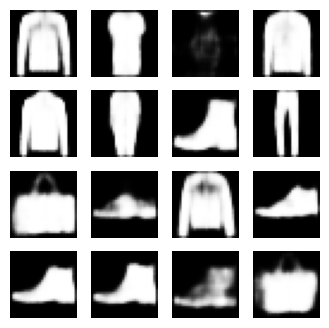

In [7]:
epochs = 10
# set the dimensionality of the latent space to a plane for visualization later
latent_dim = 10
num_examples_to_generate = 16

# keeping the random vector constant for generation (prediction) so
# it will be easier to see the improvement.
random_vector_for_generation = tf.random.normal(
    shape=[num_examples_to_generate, latent_dim])
model = CVAE(latent_dim)

def generate_and_save_images(model, epoch, test_sample):
  mean, logvar = model.encode(test_sample)
  z = model.reparameterize(mean, logvar)
  predictions = model.sample(z)
  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
    plt.subplot(4, 4, i + 1)
    plt.imshow(predictions[i, :, :, 0], cmap='gray')
    plt.axis('off')

  # tight_layout minimizes the overlap between 2 sub-plots
  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

# Pick a sample of the test set for generating output images
assert batch_size >= num_examples_to_generate
for test_batch in test_dataset.take(1):
  test_sample = test_batch[0:num_examples_to_generate, :, :, :]


generate_and_save_images(model, 0, test_sample)

for epoch in range(1, epochs + 1):
  start_time = time.time()
  for train_x in train_dataset:
    train_step(model, train_x, optimizer)
  end_time = time.time()

  loss = tf.keras.metrics.Mean()
  for test_x in test_dataset:
    loss(compute_loss(model, test_x))
  elbo = -loss.result()
  display.clear_output(wait=False)
  print('Epoch: {}, Test set ELBO: {}, time elapse for current epoch: {}'
        .format(epoch, elbo, end_time - start_time))
  generate_and_save_images(model, epoch, test_sample)

The VAE actually ended up learning the shapes pretty well. It did better when I increased the dimensionality of the latent space. It's a bit fuzzy, but I think that is sort of a limitation with the decoder architecture.

In [20]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model


def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator = make_generator_model()
discriminator = make_discriminator_model()

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)


EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

BATCH_SIZE = 32
# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))


def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

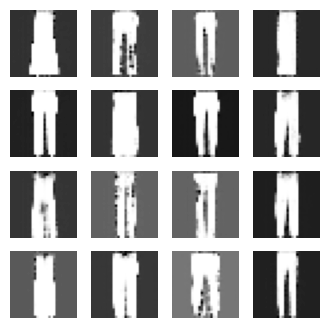

In [21]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as you go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # # Save the model every 15 epochs
    # if (epoch + 1) % 15 == 0:
    #   checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)


train(train_dataset, EPOCHS)

In the end, the gan actually ended up doing much worse (and only generating pants?). They have a bit more sharp colors, but it didn't even learn that the background should always be black. I sort of suspect that something went wrong here.